# Proyek Analisis Data: Brazilian E-Commerce
- **Nama:** Gufranaka Samudra
- **Email:** gufranakasamudra348@gmail.com
- **ID Dicoding:** gufranaka_samudra

## Menentukan Pertanyaan Bisnis

- Melihat presentase tipe pembayaran yang di lakukan Users
- Melihat top 10 city dengan order terbanyak setiap tahunnya
- Melihat pertumbuhan order setiap bulan nya dalam setahun

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

Merge data
- cukup gunakan table `orders_payments_df`
- `orders_df` dan `orders_customers_df` (customer_id)
- cukup dengan table `orders_df`

### Gathering Data

In [2]:
orders_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
orders_payments_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
orders_customers_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
orders_items_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")

products_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv")

geolocation_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")

In [3]:
# # change name of zip code in geolication table
# geolocation_df.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"}, inplace=True)

# # merge all of table to one table
# df = pd.merge(orders_df, orders_payments_df, on="order_id")
# df = pd.merge(df, orders_customers_df, on="customer_id")
# df = pd.merge(df, orders_items_df, on="order_id")
# df = pd.merge(df, products_df, on="product_id")
# df = pd.merge(df, geolocation_df, on="customer_zip_code_prefix")

# df.head(2)

In [4]:
# merge orders_df with orders_customers_df
orders_with_cutomers_df = pd.merge(orders_df, orders_customers_df, on="customer_id")
orders_with_cutomers_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


### Assessing Data

#### Check Info of Data

In [5]:
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [6]:
orders_with_cutomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Check Missing Values

In [8]:
orders_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [9]:
orders_with_cutomers_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [10]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Check Duplicated in Data

In [11]:
# see the number of duplicate data
print("Orders Items Products: ", orders_payments_df.duplicated().sum())
print("Orders with Customers: ", orders_with_cutomers_df.duplicated().sum())
print("Orders: ", orders_df.duplicated().sum())

Orders Items Products:  0
Orders with Customers:  0
Orders:  0


#### Describe Data

In [12]:
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [13]:
orders_with_cutomers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-02-19 15:37:47,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Result Assesing

##### Info Data

Pada table `order_payments_df` tidak ada kejanggalan pada datanya, namun ada beberapa problem tipe data pada table `orders_with_cutomers_df` dan `orders_df` yang memiliki ketidaksesuaian tipe data. Yaitu terdapat tipe data tanggal namun tertulis object di pandas Dataframe. Sehingga kita harus merubah jenis data tanggal menjadi tipe data yang seharusnya pada table `orders_with_cutomers_df` dan `orders_df`

##### Missing Value

Terdapat beberapa adanya missing value pada table `orders_with_cutomers_df` dan `orders_df`. Jalan yang akan di ambil adalah dengan menghapus data tersebut, dengan alasan data yang dimiliki cukup banyak dari pada total missing valuenya. Sehingga tidak akan terjadi impact yang signifikan terhadap perubahan data.

##### Duplicated

Data yang akan di proses tidak memiliki nilai yang duplikat, sehingga kita tidak perlu melakukan apa-apa terhadap table manapun.

##### Describe Data

Juga tidak ada keanehan pada data setelah melakukan describe menggunakan fungsi `.describe()`

### Cleaning Data

#### Change data type to datetime pandas

In [25]:
# change data type object to datetime pandas

# set columns of table
change_to_datetime = ["order_purchase_timestamp", "order_approved_at", 
                      "order_delivered_carrier_date", "order_delivered_customer_date", 
                      "order_estimated_delivery_date"]

# looping for each columns
for column in change_to_datetime:
    orders_with_cutomers_df[column] = pd.to_datetime(orders_with_cutomers_df[column], format="%Y-%m-%d %H:%M:%S")
    orders_df[column] = pd.to_datetime(orders_df[column], format="%Y-%m-%d %H:%M:%S")

In [26]:
orders_with_cutomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Drop Missing Value

In [28]:
# drop missing value in orders_with_cutomers_df
orders_with_cutomers_df.dropna(axis=0, inplace=True)

# drop missing value in orders_df
orders_df.dropna(axis=0, inplace=True)

In [29]:
orders_with_cutomers_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [30]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

## Exploratory Data Analysis (EDA)

### RFM Analysis

## Visualization & Explanatory Analysis

### Quetion 1: Melihat presentase tipe pembayaran yang di lakukan Users

In [46]:
# view value_counts from payment_type
orders_payments_df["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64


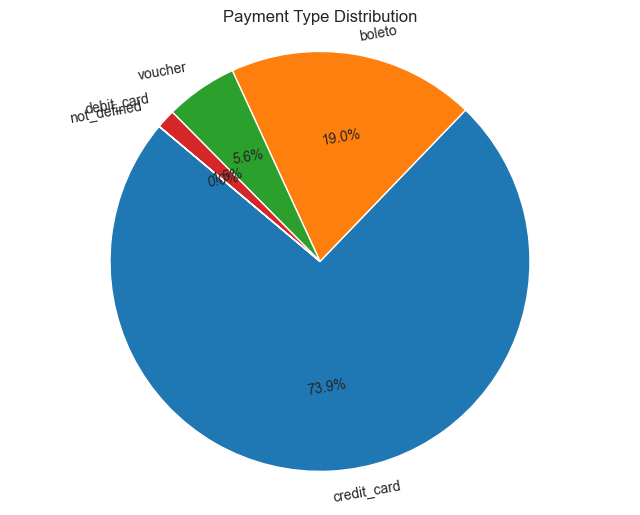

In [64]:
# Data value counts dari payment_type
total_counts = orders_payments_df["payment_type"].count()
value_counts = orders_payments_df["payment_type"].value_counts()

payment_type_percentages = (value_counts / total_counts) * 100
print(payment_type_percentages.round(2))

# Plot pie chart
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, textprops={'rotation': 10})
plt.title('Payment Type Distribution')
plt.axis('equal')  # Menyamakan skala sumbu x dan y untuk membuat lingkaran
plt.show()

### Quetion 2: Melihat top 10 city dengan order terbanyak setiap tahunnya

In [63]:
orders_with_cutomers_df["customer_city"].value_counts().head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: count, dtype: int64

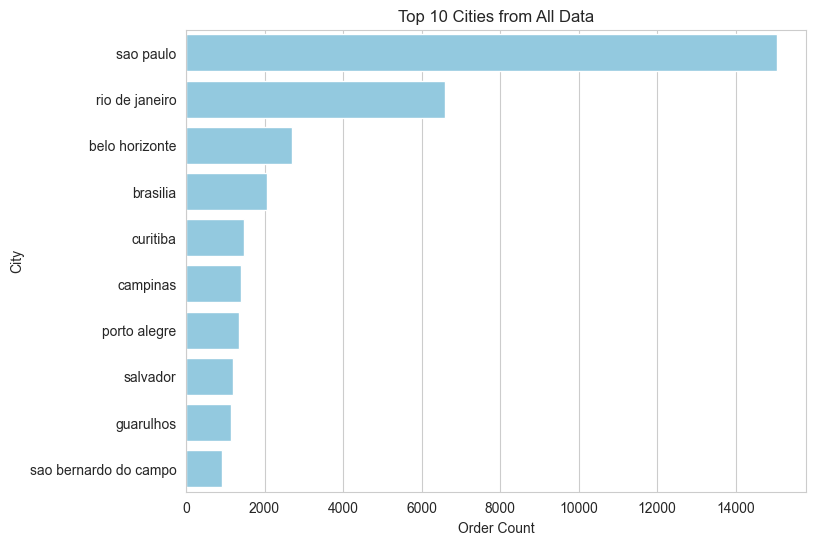

In [70]:
top_10_city_order = orders_with_cutomers_df["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order.values, y=top_10_city_order.index, color="skyblue")

plt.title('Top 10 Cities from All Data')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.show()

In [89]:
# looks from each years
orders_with_cutomers = orders_with_cutomers_df.copy()
orders_with_cutomers = orders_with_cutomers[["order_purchase_timestamp", "customer_city"]]

orders_with_cutomers["month"] = orders_with_cutomers["order_purchase_timestamp"].dt.month
orders_with_cutomers["years"] = orders_with_cutomers["order_purchase_timestamp"].dt.year

# lets seperate with years
# 2016
orders_with_cutomers_2016 = orders_with_cutomers[orders_with_cutomers["years"] == 2016].sort_values(by="month")

# 2017
orders_with_cutomers_2017 = orders_with_cutomers[orders_with_cutomers["years"] == 2017].sort_values(by="month")

# 2018
orders_with_cutomers_2018 = orders_with_cutomers[orders_with_cutomers["years"] == 2018].sort_values(by="month")

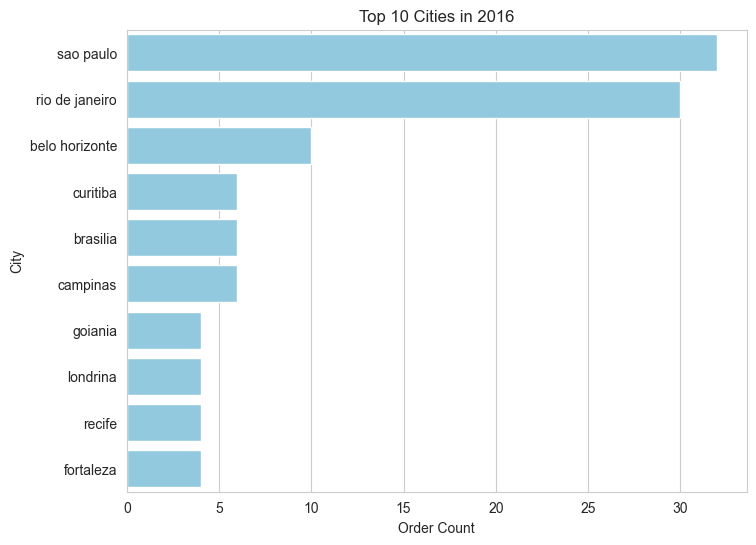

In [93]:
top_10_city_order_2016 = orders_with_cutomers_2016["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order_2016.values, y=top_10_city_order_2016.index, color="skyblue")

plt.title('Top 10 Cities in 2016')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.show()

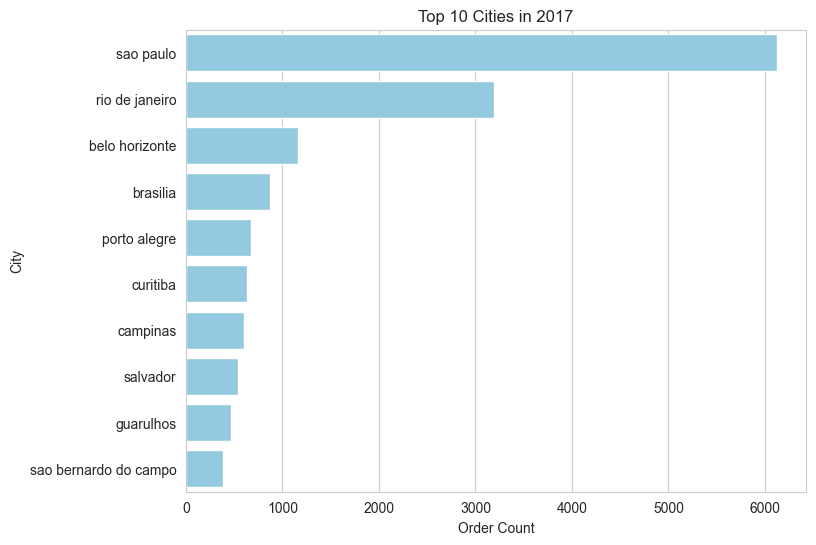

In [94]:
top_10_city_order_2017 = orders_with_cutomers_2017["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order_2017.values, y=top_10_city_order_2017.index, color="skyblue")

plt.title('Top 10 Cities in 2017')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.show()

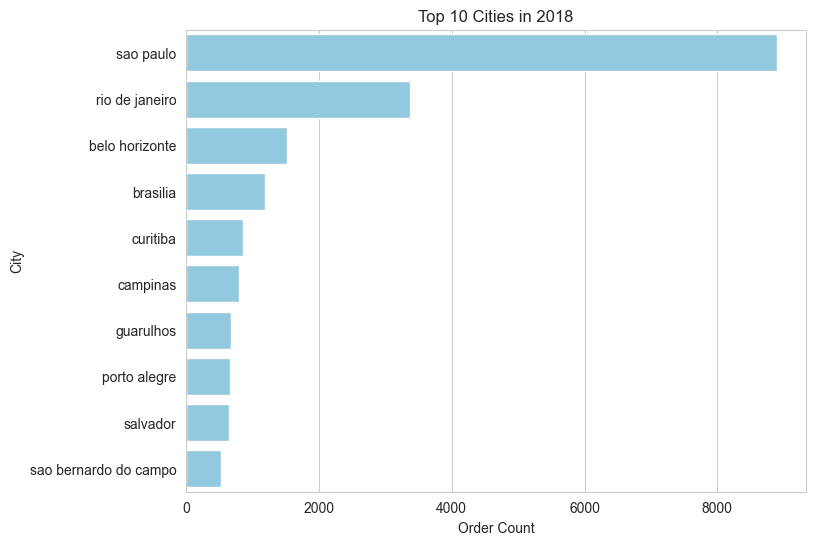

In [95]:
top_10_city_order_2018 = orders_with_cutomers_2018["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order_2018.values, y=top_10_city_order_2018.index, color="skyblue")

plt.title('Top 10 Cities in 2018')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.show()

### Quetion 3: Melihat pertumbuhan order setiap bulan nya dalam setahun

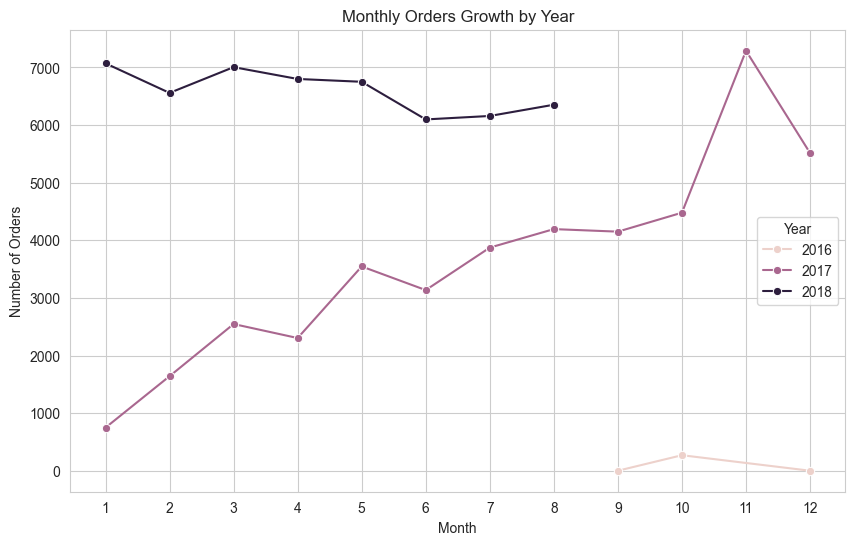

In [123]:
orders_growth = orders_df.copy()

# create new column 'month' within contain from order_purchase_timestamp
orders_growth["month"] = orders_growth["order_purchase_timestamp"].dt.month

# create new column 'year' within contain from order_purchase_timestamp
orders_growth["year"] = orders_growth["order_purchase_timestamp"].dt.year

# group the data by year and month, then calculate the number of orders
monthly_orders = orders_growth.groupby(['year', 'month']).size().reset_index(name='count')

# plotting monthly growth from each year
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=monthly_orders, x='month', y='count', hue='year', marker='o')

plt.title('Monthly Orders Growth by Year')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()

## Conclusion

- **Question 1:** We can observe that the predominant payment method is credit card, followed by boleto. Boleto is a popular payment method in Brazil for online transactions. However, it's clear that credit card payments constitute a significant percentage, almost `74%`.

- **Question 2:** Looking at the top 10 cities with the highest number of orders, considering the entire dataset spanning 3 years, Sao Paulo stands out with the highest number of orders, even when broken down annually. It might be worthwhile to focus our target market efforts on this city.

- **Question 3:** The order growth has been consistently increasing each year, with the peak occurring in November 2017, where orders exceeded `7000`. In 2018, the orders remained consistently between `6000` and `7000`.